/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


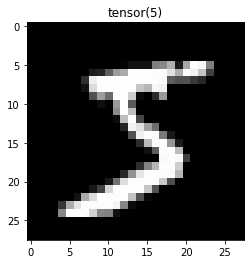

torch.Size([60000, 28, 28])

In [1]:
from pathlib import Path
from utils.dataset import MnistHandWroteNumber

training_datas, size = MnistHandWroteNumber.download(Path("./data/"))
size

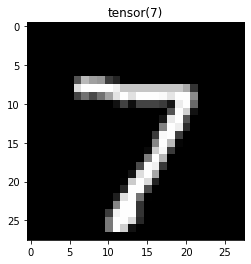

torch.Size([10000, 28, 28])

In [2]:
test_datas, size = MnistHandWroteNumber.download(Path("./data/"), train=False)
size

In [3]:
from base.classifier import CNN, training


cnn = CNN()
cnn

CNN(
  (conv1): Sequential(
    (0): Conv2d(1, 16, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv2): Sequential(
    (0): Conv2d(16, 32, kernel_size=(5, 5), stride=(1, 1), padding=(2, 2))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (out): Linear(in_features=1568, out_features=10, bias=True)
)

In [4]:
training(cnn, training_datas, test_datas)

/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:80: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")
/Users/shemyu/Documents/programing/hwnum_model/src/base/classifier.py:46: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  Variable(torch.unsqueeze(test_datas.test_data, dim=1), volatile=True).type(
/opt/homebrew/anaconda3/envs/hm/lib/python3.10/site-packages/torchvision/datasets/mnist.py:70: UserWarning: test_labels has been renamed targets
  warnings.warn("test_labels has been renamed targets")


Epoch:  0 | train loss: 2.3051 | test accuracy: 0.13
Epoch:  0 | train loss: 0.6456 | test accuracy: 0.80
Epoch:  0 | train loss: 0.3370 | test accuracy: 0.88
Epoch:  0 | train loss: 0.2767 | test accuracy: 0.91
Epoch:  0 | train loss: 0.1396 | test accuracy: 0.94
Epoch:  0 | train loss: 0.1254 | test accuracy: 0.94
Epoch:  0 | train loss: 0.2095 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0740 | test accuracy: 0.95
Epoch:  0 | train loss: 0.1881 | test accuracy: 0.95
Epoch:  0 | train loss: 0.0973 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0707 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0635 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0390 | test accuracy: 0.97
Epoch:  0 | train loss: 0.2678 | test accuracy: 0.96
Epoch:  0 | train loss: 0.1337 | test accuracy: 0.96
Epoch:  0 | train loss: 0.0163 | test accuracy: 0.97
Epoch:  0 | train loss: 0.1022 | test accuracy: 0.97
Epoch:  0 | train loss: 0.0486 | test accuracy: 0.98
Epoch:  0 | train loss: 0.0326 | test accuracy

In [7]:
import torch
from torch.autograd import Variable

test_x = (
        Variable(torch.unsqueeze(test_datas.test_data, dim=1), volatile=True).type(
            torch.FloatTensor
        )[:2000]
        / 255.0
    )  # shape from (2000, 28, 28) to (2000, 1, 28, 28), value in range(0,1)
test_y = test_datas.test_labels[:2000]
test_output, _ = cnn(test_x[:10])
pred_y = torch.max(test_output, 1)[1].data.numpy().squeeze()
print(pred_y)
print(test_y[:10])

[7 2 1 0 4 1 4 9 5 9]
tensor([7, 2, 1, 0, 4, 1, 4, 9, 5, 9])


/var/folders/l9/f8z7rln10csfw2nb2hqgxbrm0000gn/T/ipykernel_24240/827314457.py:5: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  Variable(torch.unsqueeze(test_datas.test_data, dim=1), volatile=True).type(
